#### Load base required libraries from msmbuilder and python

In [1]:
#msmbuilder imports 
from msmbuilder.dataset import dataset
from msmbuilder.utils import verboseload
from msmbuilder.msm import ContinuousTimeMSM
from msmbuilder.utils.nearest import KDTree

#python imports
import os,glob
import numpy as np
import pickle

#prettier plots
import seaborn as sns
%pylab inline
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20 
matplotlib.rcParams['font.family'] = "sans-serif"

Populating the interactive namespace from numpy and matplotlib


In [2]:
#load the necessary models
tica_mdl = verboseload("tica_mdl.pkl")
tica_data=dataset("./reg_ticas_500lt_10tics/")

kmeans_mdl = verboseload("kmeans_mdl.pkl")

msm_mdl = ContinuousTimeMSM()
msm_mdl.__dict__.update(**pickle.load(open("msm_mdl.pkl",'rb')))

loading "tica_mdl.pkl"...
loading "kmeans_mdl.pkl"...


#### Subsample the data for faster processing

In [3]:
sub_tica_data = [tica_data[i] for i in np.arange(0,len(tica_data),10)]
ktree=KDTree(sub_tica_data)
txx=np.concatenate(sub_tica_data)
sl=list(msm_mdl.mapping_.keys())

#### Project the model onto dominant slow modes

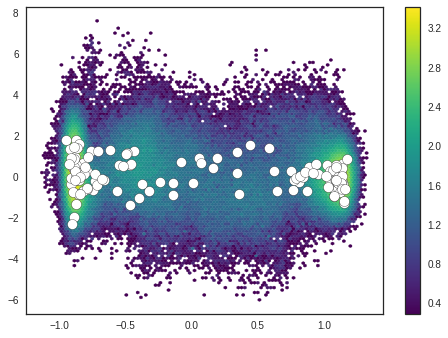

In [4]:
sns.set_style('white')
p=hexbin(txx[:,0],txx[:,1],bins='log',mincnt=1,cmap='viridis')
scatter(kmeans_mdl.cluster_centers_[sl,0],kmeans_mdl.cluster_centers_[sl,1],s=100,c='white')
colorbar(p)


In [5]:
ind1 = np.where(kmeans_mdl.cluster_centers_[:,0]>1)[0][0]
ind2 = np.where(kmeans_mdl.cluster_centers_[:,0]<-0.75)[0][1]

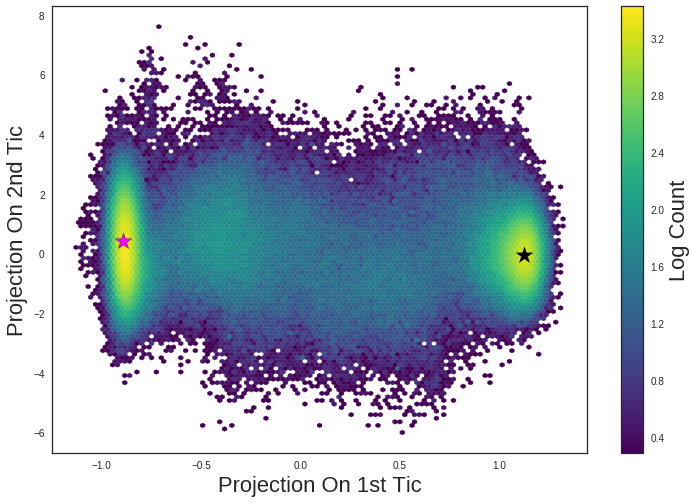

In [6]:
figure(figsize=(12,8))
sns.set_style('white')
p=hexbin(txx[:,0],txx[:,1],bins='log',mincnt=1,cmap='viridis')
scatter(kmeans_mdl.cluster_centers_[ind1,0],kmeans_mdl.cluster_centers_[ind1,1],s=300,c='black',marker='*')
scatter(kmeans_mdl.cluster_centers_[ind2,0],kmeans_mdl.cluster_centers_[ind2,1],s=300,c='magenta',marker='*')

xlabel("Projection On 1st Tic",size=22)
ylabel("Projection On 2nd Tic", size=22)
cb=colorbar(p)
cb.set_label(size=22,label="Log Count")


#### Pull relevant frames from the trajectories

In [18]:
import mdtraj as md
trj_ds = dataset("../trajectories/*.lh5")

In [19]:
trj_list = []
for cind in [ind1,ind2]:
    pt = kmeans_mdl.cluster_centers_[cind]
    _,(t,f) = ktree.query(pt)
    print(t,f)
    trj_list.append(trj_ds[t*10][f])

1257 24
1410 2


In [150]:
trj = trj_list[0]+trj_list[1:]
trj.save_pdb("two.pdb")